<a href="https://colab.research.google.com/github/navyagona/Bootcamp_2K24/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer churn
Customer churn, also called customer attrition, is when a business loses customers over time. This means the percentage of people who stop using a service within a certain period. It's important for businesses to understand and analyze customer churn because keeping current customers is usually cheaper than getting new ones.

The churn rate is the percentage of customers who leave a service during a specific time frame.

By studying customer churn, businesses can create strategies to keep their customers happy, improve satisfaction, and increase profits.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

In [12]:
import pandas as pd
df = pd.read_csv(r"/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

##Study Data

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


df.describe() method provides a summary of statistics for the numerical columns in our dataset

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


from matplotlib import pyplot as plt
_df_8['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='SeniorCitizen', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['SeniorCitizen'].plot(kind='line', figsize=(8, 4), title='SeniorCitizen')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

df.info() method in pandas provides a concise summary of a DataFrame, including the index dtype and column dtypes, non-null values, and memory usage. This method is particularly useful for getting a quick overview of dataset and identifying columns with missing values.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting the TotalCharges column to a numerical type to handle any issues during the conversion.

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

checking for null values

In [19]:
# Check for null values
null_values = df.isnull().sum()
null_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##HANDLE NULL VALUES AND OUTLIERS

 we will fill missing values in the TotalCharges column with the median value of that column and then verify that there are no more null values.

In [20]:
# Fill missing values in 'TotalCharges' with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Verify there are no more null values
null_values_after = df.isnull().sum()
null_values_after

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###outliers

In [21]:
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers)

# Identify and count outliers
outliers_monthlycharges, num_outliers_monthlycharges = count_outliers('MonthlyCharges')
outliers_totalcharges, num_outliers_totalcharges = count_outliers('TotalCharges')
outliers_tenure, num_outliers_tenure = count_outliers('tenure')

print(f"Number of outliers in MonthlyCharges: {num_outliers_monthlycharges}")
print(f"Number of outliers in TotalCharges: {num_outliers_totalcharges}")
print(f"Number of outliers in tenure: {num_outliers_tenure}")

Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0
Number of outliers in tenure: 0


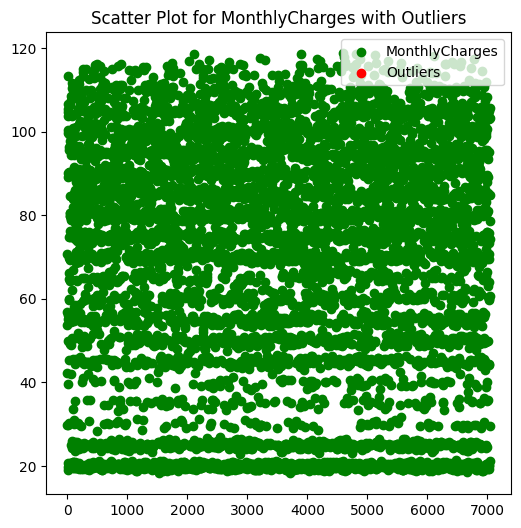

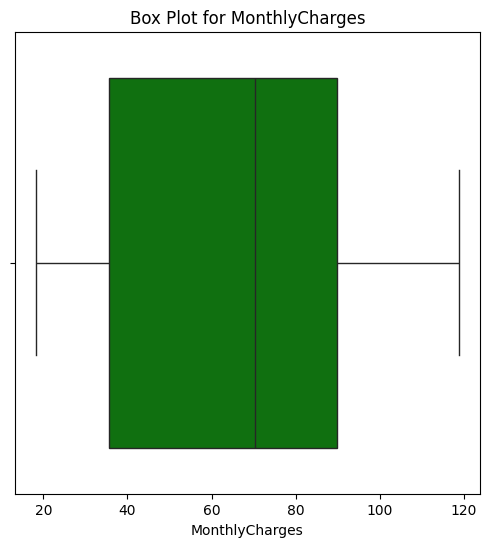

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(df.index, df['MonthlyCharges'], color='green', label='MonthlyCharges')
plt.scatter(outliers_monthlycharges.index, outliers_monthlycharges['MonthlyCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for MonthlyCharges with Outliers')
plt.legend()
plt.show()

# Box plot for MonthlyCharges
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['MonthlyCharges'], color='green')
plt.title('Box Plot for MonthlyCharges')
plt.show()

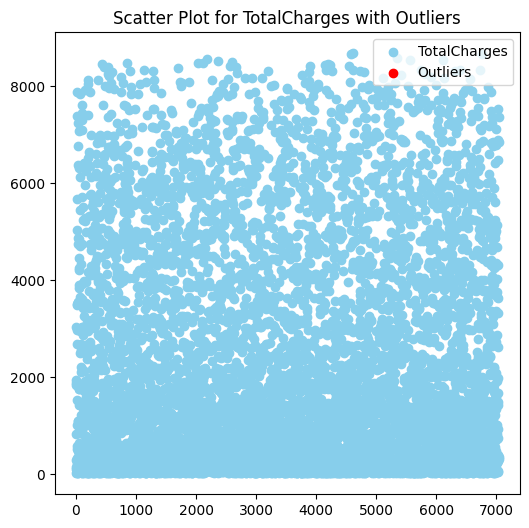

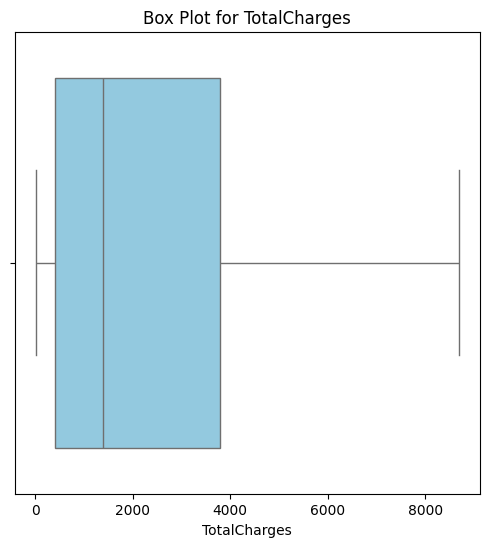

In [28]:
# Scatter plot for TotalCharges with Outliers
plt.figure(figsize=(6, 6))
plt.scatter(df.index, df['TotalCharges'], color='skyblue', label='TotalCharges')
plt.scatter(outliers_totalcharges.index, outliers_totalcharges['TotalCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for TotalCharges with Outliers')
plt.legend()
plt.show()

# Box plot for TotalCharges
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['TotalCharges'], color='skyblue')
plt.title('Box Plot for TotalCharges')
plt.show()

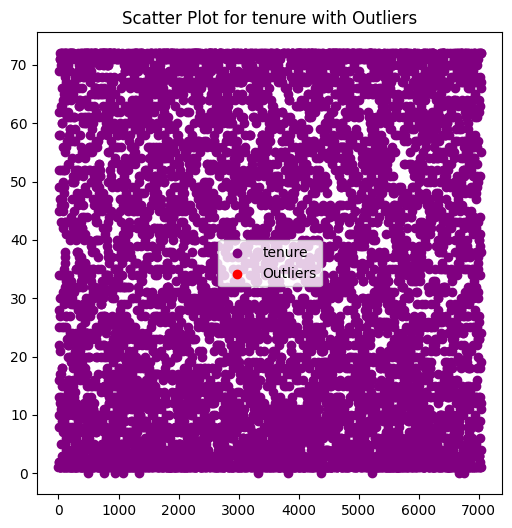

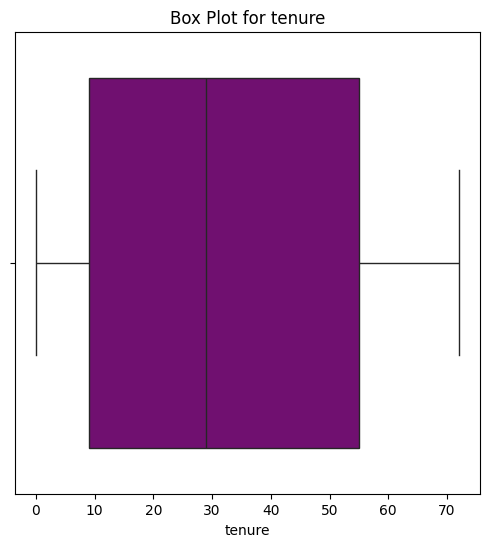

In [29]:
# Scatter plot for tenure with Outliers
plt.figure(figsize=(6, 6))
plt.scatter(df.index, df['tenure'], color='purple', label='tenure')
plt.scatter(outliers_tenure.index, outliers_tenure['tenure'], color='red', label='Outliers')
plt.title('Scatter Plot for tenure with Outliers')
plt.legend()
plt.show()

# Box plot for tenure
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['tenure'], color='purple')
plt.title('Box Plot for tenure')
plt.show()

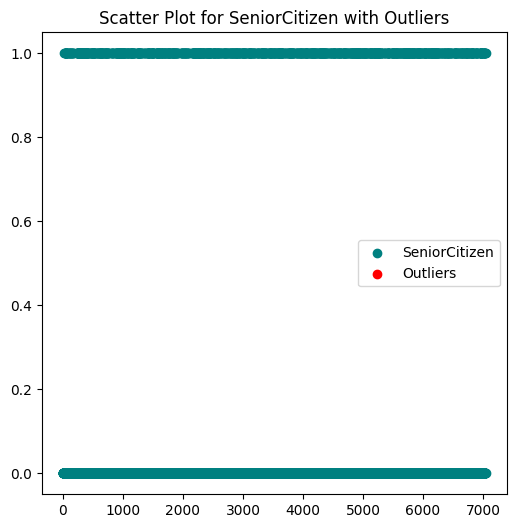

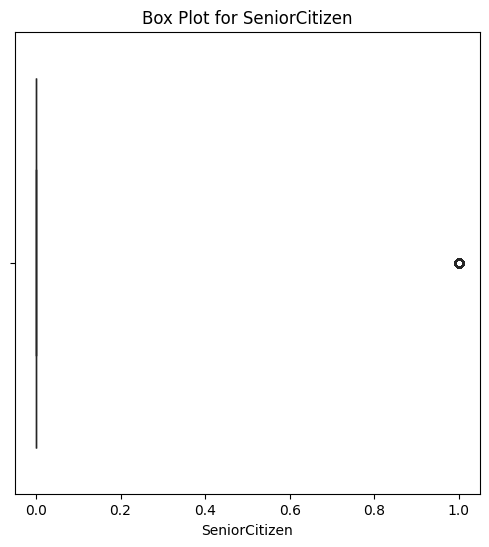

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [30]:
# Scatter plot for SeniorCitizen with Outliers
plt.figure(figsize=(6, 6))
plt.scatter(df.index, df['SeniorCitizen'], color='teal', label='SeniorCitizen')
plt.scatter(outliers_tenure.index, outliers_tenure['SeniorCitizen'], color='red', label='Outliers')
plt.title('Scatter Plot for SeniorCitizen with Outliers')
plt.legend()
plt.show()

# Box plot for SeniorCitizen
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['SeniorCitizen'], color='teal')
plt.title('Box Plot for SeniorCitizen')
plt.show()

# Display the value counts
senior_citizen_counts = df['SeniorCitizen'].value_counts()
print(senior_citizen_counts)

##Exploratory Data Analysis (EDA)

This code calculates the churn rate by dividing the number of customers who churned (those with 'Yes' in the 'Churn' column) by the total number of customers in the dataset.
It then prints the churn rate as a percentage with two decimal places.

In [31]:
total_customers = len(df)
churned_customers = df['Churn'].value_counts().get('Yes', 0)
churn_rate = churned_customers / total_customers

print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 26.54%


###Univariate Analysis
This code visualizes the distributions and box plots for numerical variables (`tenure`, `MonthlyCharges`, `TotalCharges`, and `SeniorCitizen`) from the dataset using histograms and box plots, with each plot having a unique color for clarity. It helps identify the distribution patterns and potential outliers within these variables. The `plt.tight_layout()` function ensures the plots are neatly arranged without overlapping.

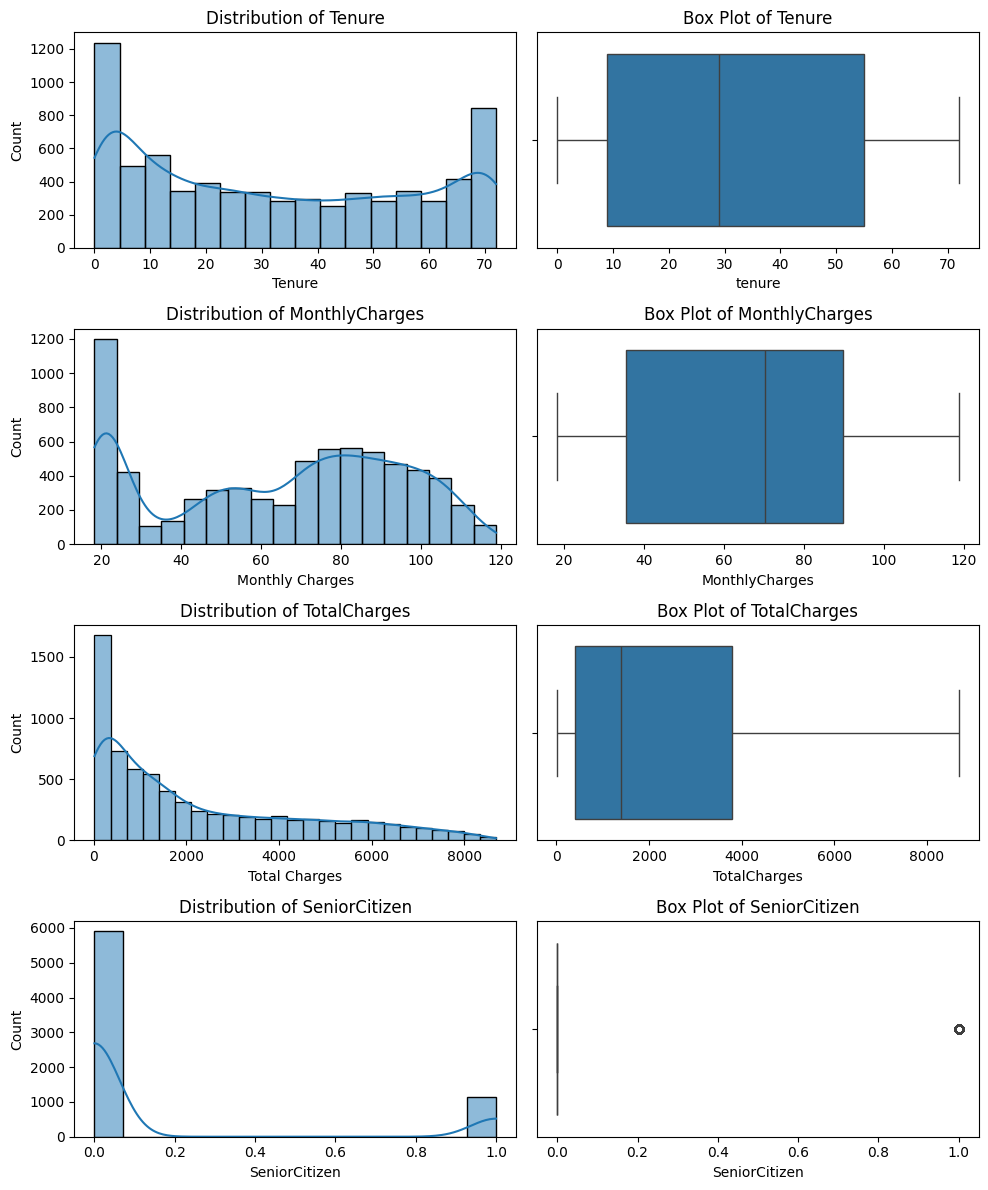

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 12))

plt.subplot(4, 2, 1)
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')

plt.subplot(4, 2, 2)
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Tenure')

plt.subplot(4, 2, 3)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('Monthly Charges')

plt.subplot(4, 2, 4)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot of MonthlyCharges')

plt.subplot(4, 2, 5)
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of TotalCharges')
plt.xlabel('Total Charges')

plt.subplot(4, 2, 6)
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot of TotalCharges')

plt.subplot(4, 2, 7)
sns.histplot(df['SeniorCitizen'], kde=True)
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')

plt.subplot(4, 2, 8)
sns.boxplot(x=df['SeniorCitizen'])
plt.title('Box Plot of SeniorCitizen')

plt.tight_layout()
plt.show()

### Bivariate Analysis

Bivariate analysis is a statistical technique used to study the relationship between two variables. This method explores the association, correlation, or interaction between the variables to determine if and how they influence each other.

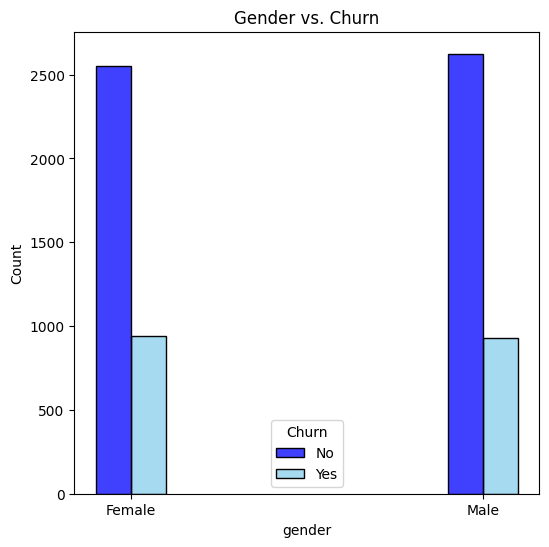

In [47]:

custom_colour = ['blue', 'skyblue']

plt.figure(figsize=(6, 6))
sns.histplot(x='gender', hue='Churn', data=df, shrink=0.2, multiple='dodge', palette=custom_colour)
plt.title('Gender vs. Churn')
plt.show()


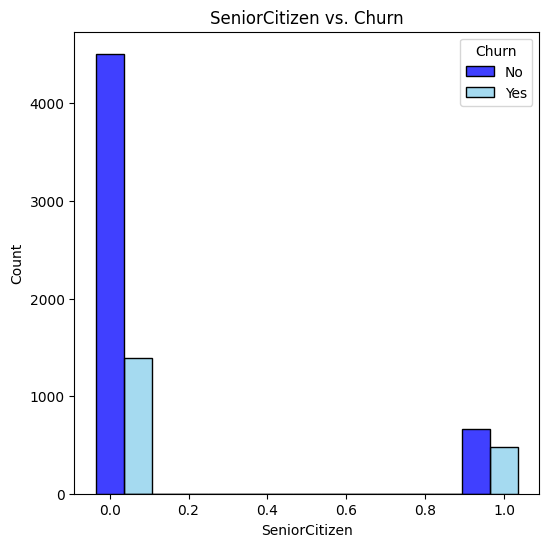

In [48]:
custom_colour = ['blue', 'skyblue']
plt.figure(figsize=(6, 6))
sns.histplot(x='SeniorCitizen', hue='Churn', data=df, shrink = 2, multiple='dodge',palette=custom_colour)
plt.title('SeniorCitizen vs. Churn')
plt.show()

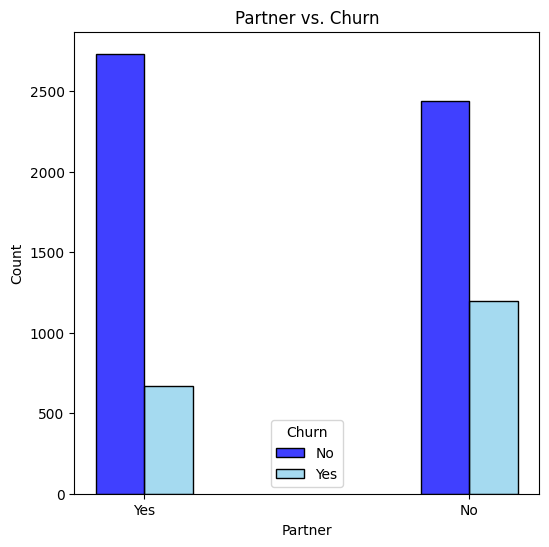

In [49]:
custom_colour = ['blue', 'skyblue']
plt.figure(figsize=(6, 6))
sns.histplot(x='Partner', hue='Churn',data=df, shrink=0.3, multiple='dodge', palette=custom_colour)
plt.title('Partner vs. Churn')
plt.show()

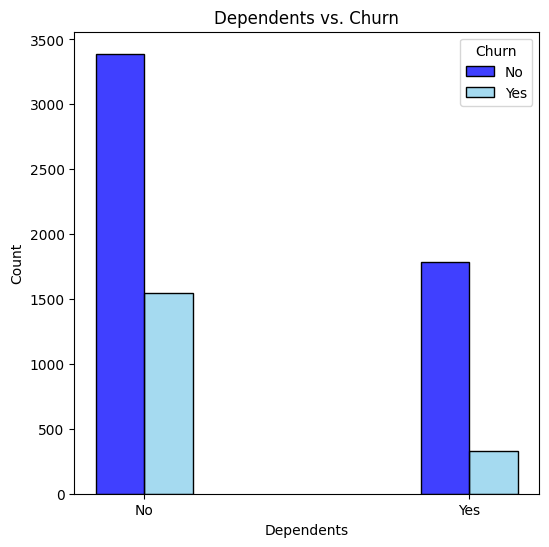

In [51]:
custom_colour = ['blue', 'skyblue']
plt.figure(figsize=(6, 6))
sns.histplot(x='Dependents', hue='Churn', data=df, shrink=0.3, multiple='dodge',palette=custom_colour)
plt.title('Dependents vs. Churn')
plt.show()

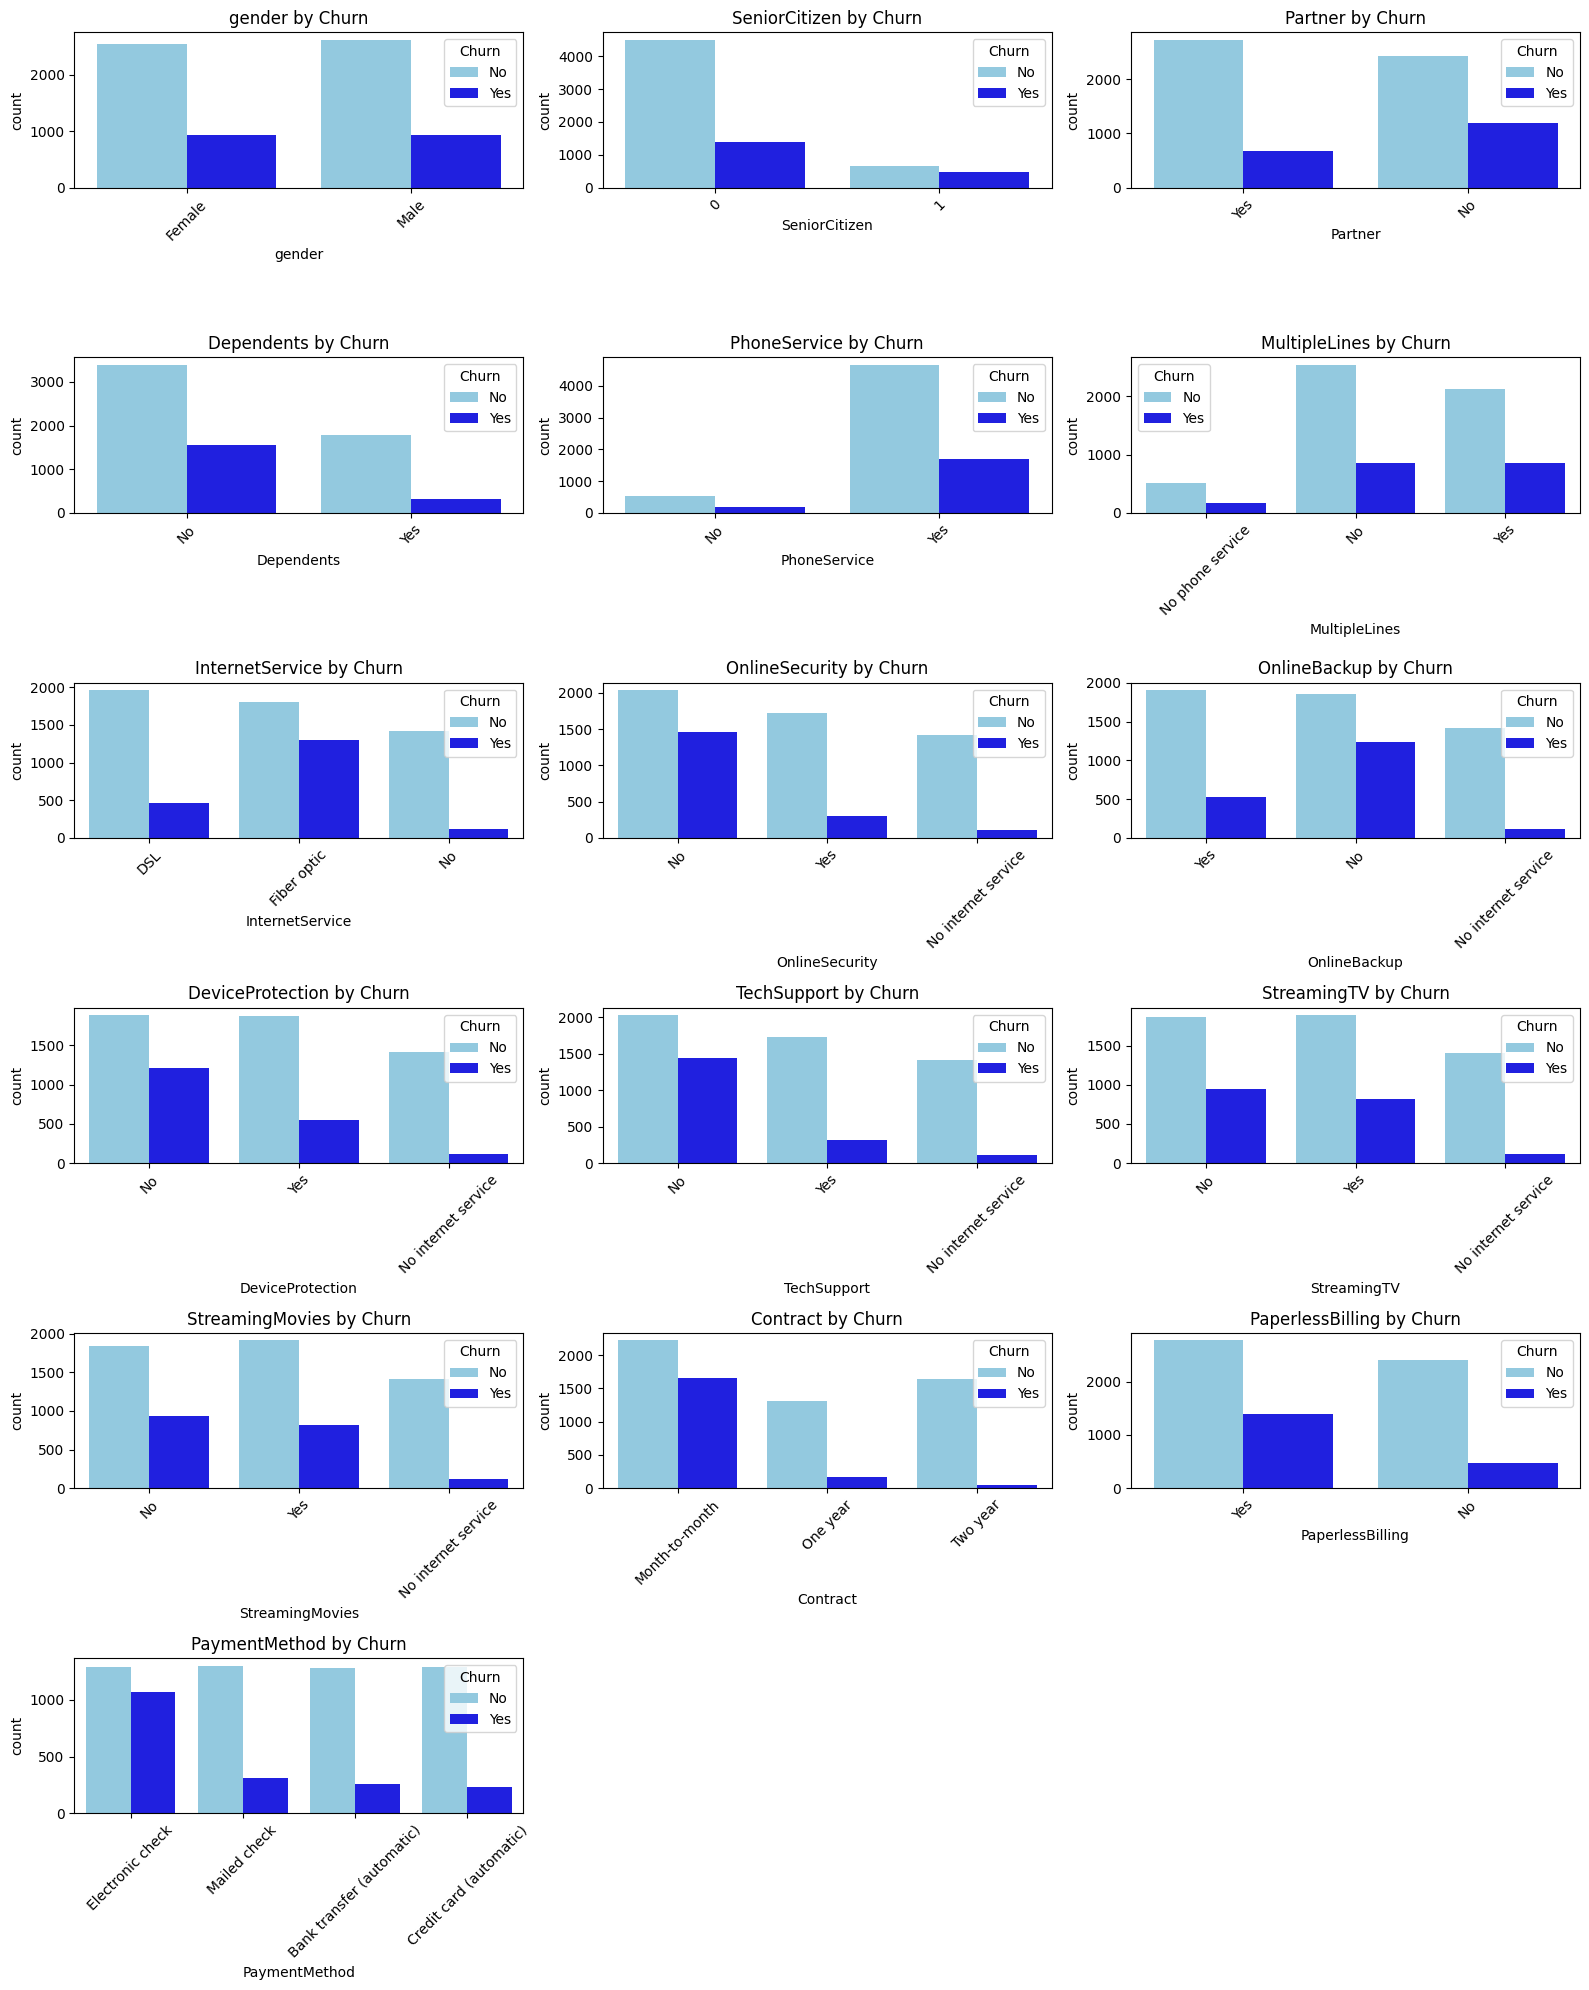

In [57]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
plt.figure(figsize=(16, 20))
custom_palette = {'No': 'skyblue', 'Yes': 'blue'}  # Define custom colors for 'No' and 'Yes'

for i, column in enumerate(categorical_columns[:-1], 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=column, hue='Churn', data=df, palette=custom_palette)
    plt.title(f'{column} by Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


This code creates a count plot (sns.countplot) showing the distribution of values in the 'Churn' column from the DataFrame df, displaying the count of each category ('Yes' and 'No') in a bar chart format.

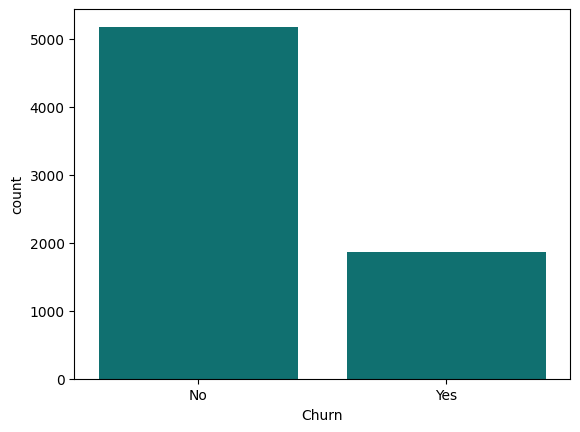

In [58]:
sns.countplot(x='Churn', data=df, color='teal')
plt.show()